## <span style="color: red;">Netflix</span> Movies and TV Shows EDA :popcorn:

In this notebook, we want to answer some random questions about Netflix as the most popular video streaming platform!

<img src="https://pic.clubic.com/v1/images/2007552/raw.webp?fit=max&width=1200&hash=48105567f1dd86b5f93b4230970135ec7642f291" alt="Watching something on Netflix" style="width: 70%;"/>

### Warming

In [29]:
import pandas as pd

In [30]:
!ls -lh ./datasets

total 64M
-rw-rw-r-- 1 sheikhartin sheikhartin  51K دسامبر   3 11:11 car_evaluation.csv
-rw-rw-r-- 1 sheikhartin sheikhartin 3.3M دسامبر  15 17:07 netflix.csv
-rw-rw-r-- 1 sheikhartin sheikhartin  59K دسامبر   3 11:11 titanic.csv
-rw-rw-r-- 1 sheikhartin sheikhartin 286K دسامبر   3 11:11 used_car_prices.csv
-rw-rw-r-- 1 sheikhartin sheikhartin  60M دسامبر   3 11:11 youtube_trends_us.csv


### Exploring

In [3]:
df = pd.read_csv('./datasets/netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


About the 12 columns of this interesting dataset:

- `show_id`: A unique ID for each show
- `type`: The category of a show — it can be `Movie` or `TV Show`
- `title`: Name of the show
- `director`: Name of the director(s) of the show
- `cast`: Actors involved in the show
- `country`: Country where the show was produced
- `date_added`: Date when the show was added on Netflix
- `release_year`: Release year of the show
- `rating`: TV rating — a content rating system
- `duration`: Time duration — in minutes or number of seasons
- `listed_in`: Genre(s)
- `description`: A summary of the show

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [32]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [33]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<AxesSubplot: >

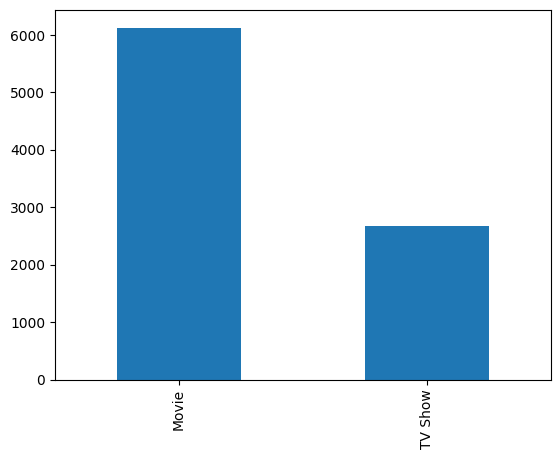

In [34]:
df['type'].value_counts() \
  .plot(kind='bar')

<AxesSubplot: >

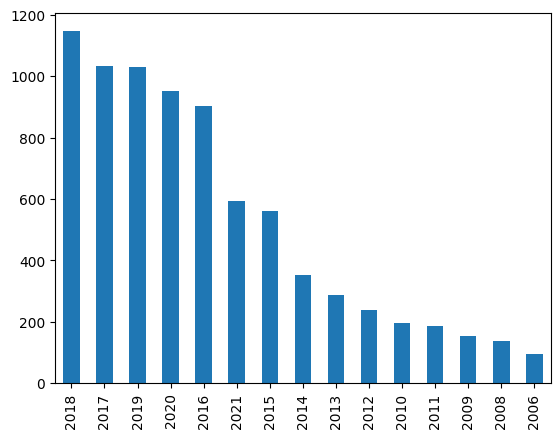

In [35]:
df['release_year'].value_counts() \
  .head(15) \
  .plot(kind='bar')

<AxesSubplot: ylabel='rating'>

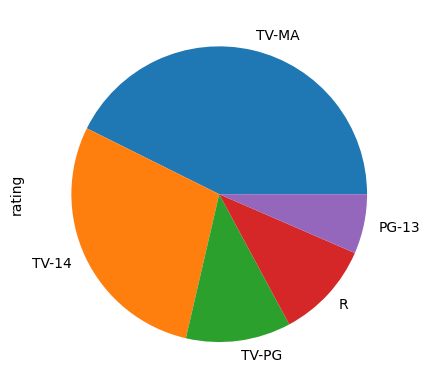

In [36]:
df['rating'].value_counts() \
  .head(5) \
  .plot(kind='pie')

<AxesSubplot: >

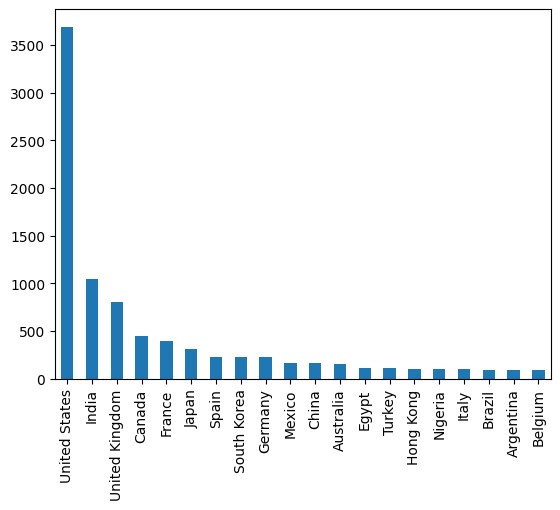

In [40]:
df['country'].str.split(', ') \
  .explode() \
  .value_counts() \
  .head(20) \
  .plot(kind='bar')

<AxesSubplot: >

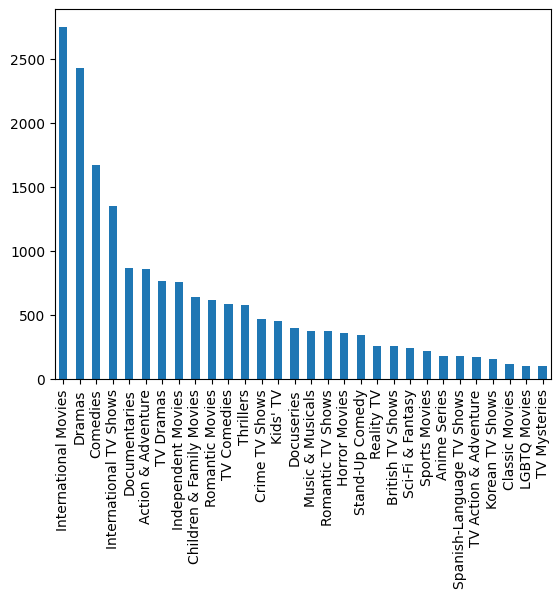

In [41]:
df['listed_in'].str.split(', ') \
  .explode() \
  .value_counts() \
  .head(30) \
  .plot(kind='bar')

<AxesSubplot: >

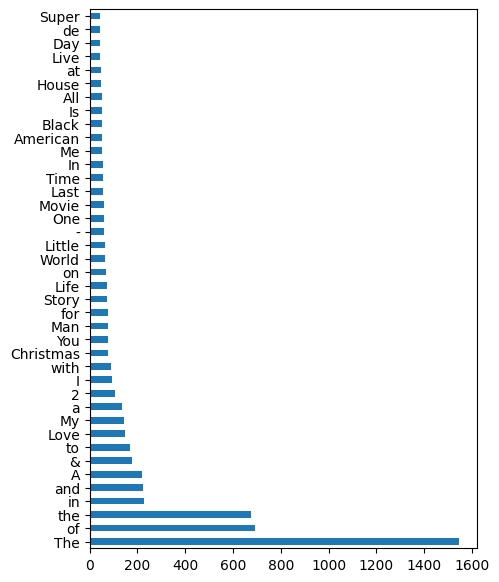

In [42]:
df['title'].str.split() \
  .explode() \
  .value_counts() \
  .head(40) \
  .plot(kind='barh', figsize=(5, 7))

### Modeling